In [1]:
"""
This notebook is for plotting beam files (ours and Joe's) 
to compare his matlab code implementation with the one we 
have in python. 
"""

import pathlib 
import re 
import glob 
import numbers 
import sys 

import numpy as np 
import scipy as sp 
import h5py 
import xarray as xr 
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Get the directory containing your module
root_dir = pathlib.Path(pathlib.Path.cwd()).resolve().parent
print(root_dir)
sys.path.append(f"{root_dir}/src") 
import grasp_lib as lib 



def mlog10(x): 
    return np.log10(np.abs(x)**2)




/run/media/admin/seagate_small/Maks/CurrProjects/SaT/CIMR-RGB/grasp-rgb-ultimate2


In [11]:
imgsdir = f"{root_dir}/imgs"
if not pathlib.Path(imgsdir).exists():
    pathlib.Path(imgsdir).mkdir() 
    print(f"Created {imgsdir}")


datafile = pathlib.Path(f'{root_dir}/output/parsed/cimr_apat_full_C_horn_01_xe.mat').resolve()
cimr     = sp.io.loadmat(datafile)

Z1 = cimr['BHS']['hpol_copol'][0][0]
Z2 = cimr['FHS']['hpol_copol'][0][0]

u_grid = cimr['BHS']['u_grid'][0][0] 
v_grid = cimr['BHS']['v_grid'][0][0] 

u = cimr['BHS']['u'][0][0]
v = cimr['BHS']['v'][0][0]
#x = np.outer(u, np.cos(v))
#y = np.outer(u, np.sin(v))
print(Z1)

print(list(matplotlib.colormaps))


cmap = plt.get_cmap('afmhot')#'bone') #'plasma') #'viridis') 
fig, axes = plt.subplots(1, 2, figsize=(15,6)) 
Z_plt = 10 * np.log10(np.abs(Z1)**2 + np.abs(Z2)**2)
pcm2 = axes[0].pcolor(u_grid, v_grid, Z_plt, shading='auto', cmap=cmap)
#pcm2 = axes.pcolor(x, y, Z_plt, shading='auto')
axes[0].set_title(r'Band: C, Horn: 1, Half-Space: Both $(|R_x|^2 + |C_x|^2)$')#, Units: [dB]')
#axes[0].set_xlabel(r'$\xi$')
#axes[0].set_ylabel(r'$\eta$')

# Create a shared color bar
divider = make_axes_locatable(axes[0])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')

# Cross Pattern 
Z1 = cimr['BHS']['hpol_cxpol'][0][0]
Z2 = cimr['FHS']['hpol_cxpol'][0][0]

Z_plt = 10 * np.log10(np.abs(Z1)**2 + np.abs(Z2)**2)
pcm2 = axes[1].pcolor(u_grid, v_grid, Z_plt, cmap='afmhot')#'PuBu')
#pcm2 = axes.pcolor(x, y, Z_plt, shading='auto')
axes[1].set_title(r'Band: C, Horn: 1, Half-Space: Both $(|R_y|^2 + |C_y|^2)$')#, Units: [dB]')

# Create a shared color bar
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax, label='[dB]')

# Saving figure
plt.savefig(f'{imgsdir}/cimr_apat_full_C_horn_01_xe.png', dpi=300) 

plt.show() 

[[nan+0.j nan+0.j nan+0.j ... nan+0.j nan+0.j nan+0.j]
 [nan+0.j nan+0.j nan+0.j ... nan+0.j nan+0.j nan+0.j]
 [nan+0.j nan+0.j nan+0.j ... nan+0.j nan+0.j nan+0.j]
 ...
 [nan+0.j nan+0.j nan+0.j ... nan+0.j nan+0.j nan+0.j]
 [nan+0.j nan+0.j nan+0.j ... nan+0.j nan+0.j nan+0.j]
 [nan+0.j nan+0.j nan+0.j ... nan+0.j nan+0.j nan+0.j]]
['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'se

/tmp/ipykernel_23365/3167709184.py:35: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')
/tmp/ipykernel_23365/3167709184.py:49: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm2, cax=cax, label='[dB]')


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some dummy data
u = np.linspace(0, 10, 100)
v = np.linspace(0, 5, 50)
u_grid, v_grid = np.meshgrid(u, v)
Z_plt = np.sin(u_grid) + np.cos(v_grid)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data using pcolor with the 'magma' colormap for each axes
for ax in axes:
    pcm = ax.pcolor(u_grid, v_grid, Z_plt, cmap='Wistia')
    fig.colorbar(pcm, ax=ax, label='Value')  # Add a colorbar for each subplot
    ax.set_xlabel('U')
    ax.set_ylabel('V')

# Set titles for the subplots
axes[0].set_title('Pcolor Plot with Magma Colormap (Axes[0])')
axes[1].set_title('Pcolor Plot with Magma Colormap (Axes[1])')

plt.show()

<class 'numpy.ndarray'>


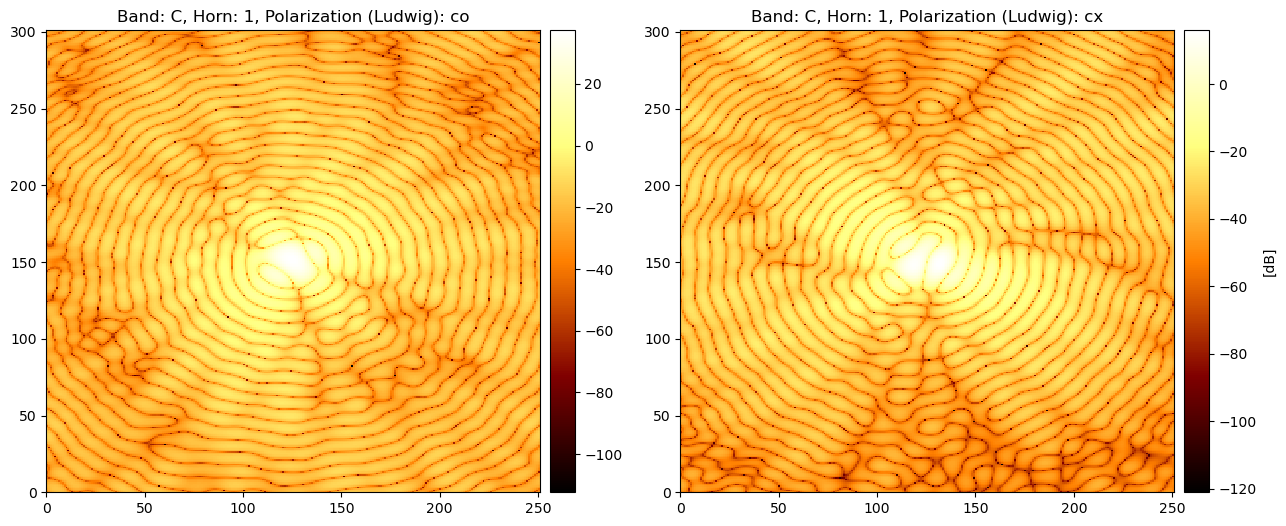

In [3]:
imgsdir = f"{root_dir}/imgs"

#datafile = pathlib.Path(f'{root_dir}/output/processed/cimr_apat_hbs_C_horn_01_uv.mat').resolve()
datafile = pathlib.Path(f'{root_dir}/output/processed/CIMR-AP-HBS-C1-UV.mat').resolve()
cimr     = sp.io.loadmat(datafile)

#Z1 = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]
#Z2 = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_cxpol'][0][0]
#Z2 = cimr['FHS']['hpol_copol'][0][0]

Z1 = cimr['hpol_copol']
Z2 = cimr['hpol_cxpol']

print(type(Z1))

#u_grid = cimr['BHS']['u_grid'][0][0] * 180 
#v_grid = cimr['BHS']['v_grid'][0][0] * 180 

#u = cimr['BHS']['u'][0][0]
#v = cimr['BHS']['v'][0][0]
#x = np.outer(u, np.cos(v))
#y = np.outer(u, np.sin(v))
#print(Z1)

# Create a shared color bar
#divider = make_axes_locatable(axes)
#cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
#cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')

cmap = plt.get_cmap('afmhot')#'bone') #'plasma') #'viridis') 
fig, axes = plt.subplots(1, 2, figsize=(15,6)) 
Z_plt = 10 * np.log10(np.abs(Z1)**2)
pcm2 = axes[0].pcolor(Z_plt, shading='auto', cmap=cmap)
#pcm2 = axes.pcolor(x, y, Z_plt, shading='auto')
axes[0].set_title(r'Band: C, Horn: 1, Polarization (Ludwig): co')#, Units: [dB]')
#axes[0].set_xlabel(r'$\xi$')
#axes[0].set_ylabel(r'$\eta$')

# Create a shared color bar
divider = make_axes_locatable(axes[0])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')

# Cross Pattern 
Z_plt = 10 * np.log10(np.abs(Z2)**2)
pcm2 = axes[1].pcolor(Z_plt, cmap='afmhot')#'PuBu')
#pcm2 = axes.pcolor(x, y, Z_plt, shading='auto')
axes[1].set_title(r'Band: C, Horn: 1, Polarization (Ludwig): cx')#, Units: [dB]')

# Create a shared color bar
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax, label='[dB]')

# Saving figure
plt.savefig(f'{imgsdir}/cimr_apat_hbs_C_horn_01_uv.png', dpi=300) 

plt.show() 


(100,)


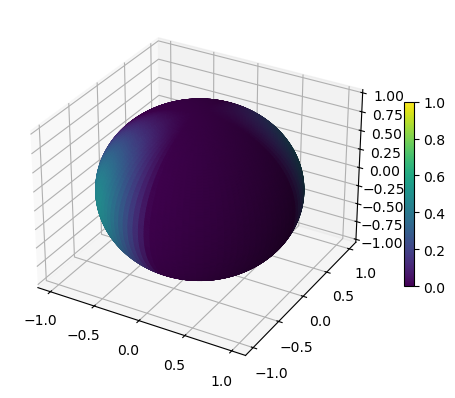

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a sphere
u = np.linspace(0, 2 * np.pi, 100)
print(u.shape)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Create some dummy data for colors
colors = np.sin(x * y)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(colors), rstride=1, cstride=1)
plt.colorbar(surface, ax=ax, shrink=0.5)
plt.show()

## Plotting results 

#### Joe

Groups in MATLAB file:
C_Horn_01

Datasets in group 'C_Horn_01/apat_xy_cart'
M33
M34
M3x
M3y
M43
M44
M4x
M4y
Mx3
Mx4
Mxx
Mxy
My3
My4
Myx
Myy
integration_time_ms
uo
up
vo
vp
<HDF5 dataset "Mxx": shape (521, 501), type "<f8">

Data in dataset 'Mxx':
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/tmp/ipykernel_37126/3241759915.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm1, cax=cax)


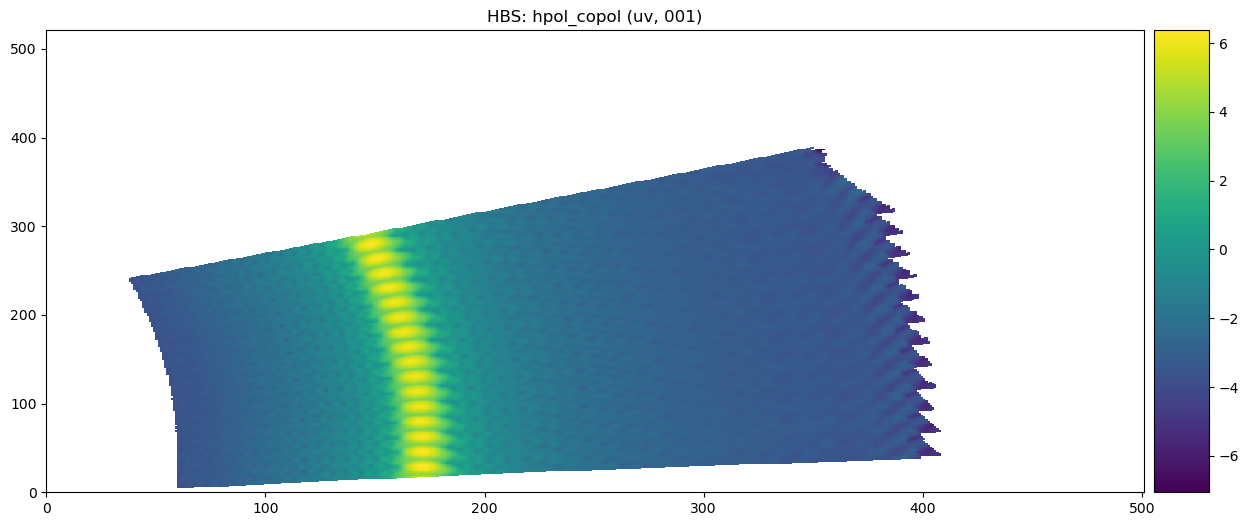

In [2]:
outdir = "data/CIMR/beams/joe/processed"
outfile2 = pathlib.Path(f'../../{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.uv.mat').resolve()
cimr = sp.io.loadmat(outfile2)


outfile = pathlib.Path(f'/run/media/admin/seagate_small/Maks/CurrProjects/SaT/CIMR-RGB/apat_ave/cimr_apat_hbs.C_Horn_01.ds_001.uv.ave.full.mat').resolve()

# Open the MATLAB file
file = h5py.File(outfile, 'r')

# List all groups in the file
print("Groups in MATLAB file:")
for group in file.keys():
    print(group)

# Access a specific group (change 'group_name' to the actual group name)
group_name = 'C_Horn_01/apat_xy_cart'
data = file[group_name]

# List all datasets in the group
print("\nDatasets in group '{}'".format(group_name))
for dataset in data.keys():
    print(dataset)

# Access a specific dataset (change 'dataset_name' to the actual dataset name)
dataset_name = 'Mxx'
dataset = data[dataset_name]

print(dataset)

# Get the data
data_values = np.log10(np.abs(dataset[:]**2))#[130:325,130:325])**2)

# Print or process the data as needed
print("\nData in dataset '{}':".format(dataset_name))
print(data_values)




imgsdir = "imgs"
cmap = plt.get_cmap('viridis') 
# Create a figure with 1x2 subplot layout
fig, axes = plt.subplots(1, 1, figsize=(15, 6))

pcm1 = axes.pcolor(data_values, shading='auto')
axes.set_title('HBS: hpol_copol (uv, 001)')
# Create a shared color bar
divider = make_axes_locatable(axes)
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm1, cax=cax)


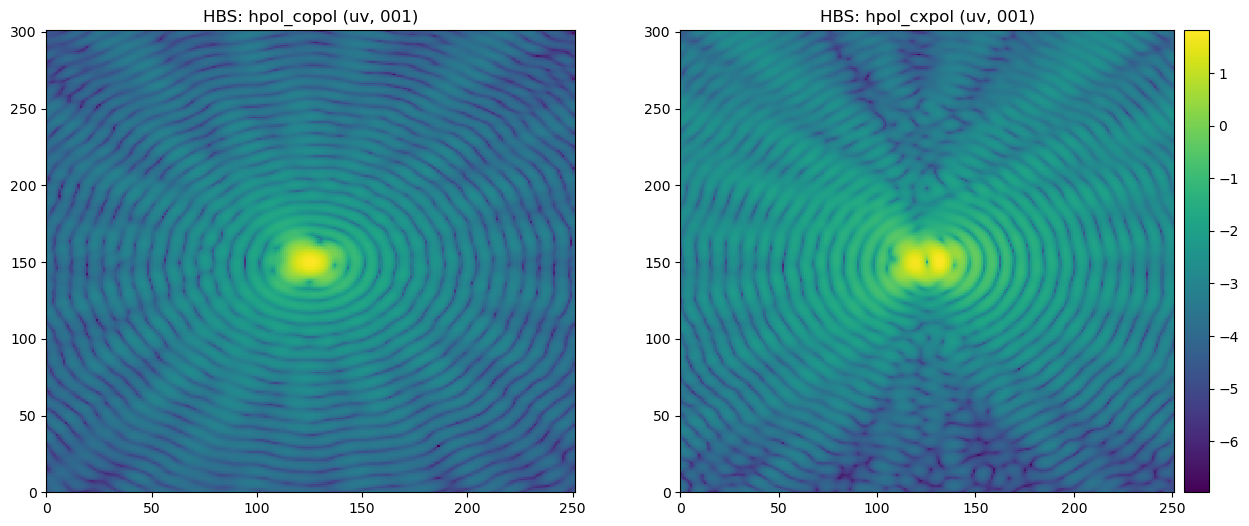

In [64]:
imgsdir = "imgs"
cmap = plt.get_cmap('viridis') 
# Create a figure with 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

Z = []
Z.append(cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0])
Z_plt = np.log10(np.abs(Z[0])**2)
pcm1 = axes[0].pcolor(Z_plt, shading='auto')
axes[0].set_title('HBS: hpol_copol (uv, 001)')


Z.append(cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_cxpol'][0][0])
Z_plt = np.log10(np.abs(Z[1])**2)
pcm2 = axes[1].pcolor(Z_plt, shading='auto')
axes[1].set_title('HBS: hpol_cxpol (uv, 001)')

# Create a shared color bar
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax)

#### Us

[[ 0.08110756  0.07413295  0.08180213 ... -0.02181255  0.05038009
   0.07875175]
 [ 0.0796009   0.0814283   0.09566875 ... -0.02150562 -0.03310701
   0.0608619 ]
 [ 0.07740661  0.08843529  0.10727992 ... -0.04070423 -0.02978877
  -0.04567901]
 ...
 [-0.05411806 -0.05197005 -0.04927589 ...  0.03379196  0.02540842
   0.02012889]
 [-0.05466531 -0.05588008 -0.05620482 ...  0.02138412  0.01255224
  -0.0060508 ]
 [-0.04655581 -0.05167458 -0.05669379 ... -0.01795597 -0.01537473
  -0.01617475]]


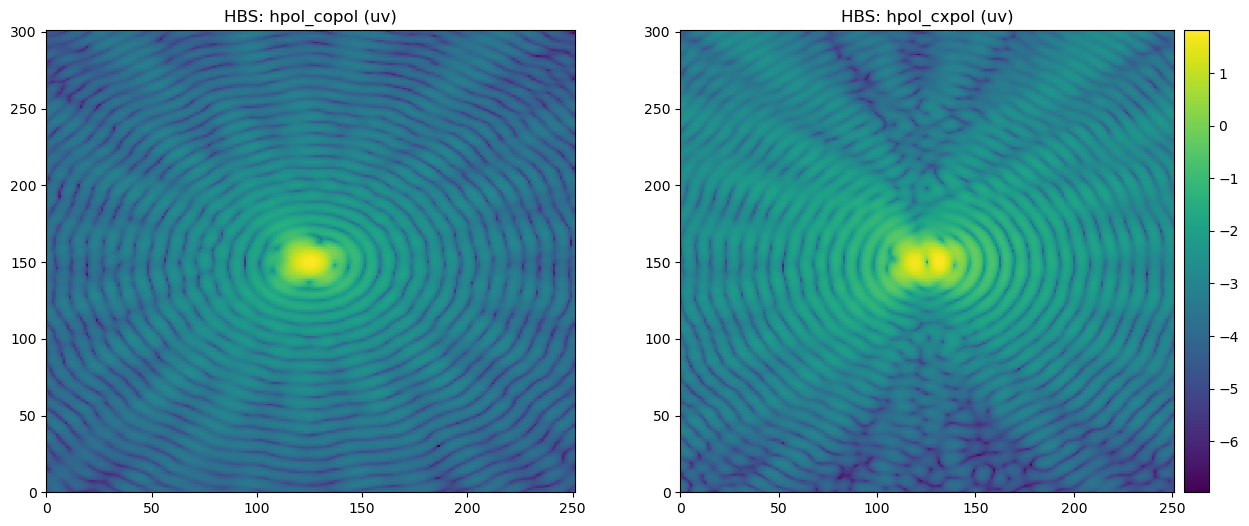

In [33]:
outdir = "output"
outfile_hdf = pathlib.Path(f'../{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.uv.h5').resolve()

with h5py.File(outfile_hdf, 'r') as hdf5_file:
    cimr = lib.load_hdf5_to_dict(hdf5_file)

imgsdir = "imgs"
cmap = plt.get_cmap('viridis') 
# Create a figure with 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

Z.append(cimr['horns']['C_Horn_01']['apat']['hpol_copol']) 
print(Z[2])
Z_plt = np.log10(np.abs(Z[2])**2)
pcm1 = axes[0].pcolor(Z_plt, shading='auto')
axes[0].set_title('HBS: hpol_copol (uv)')


Z.append(cimr['horns']['C_Horn_01']['apat']['hpol_cxpol'])
Z_plt = np.log10(np.abs(Z[3])**2)
pcm2 = axes[1].pcolor(Z_plt, shading='auto')
axes[1].set_title('HBS: hpol_cxpol (uv)')

# Create a shared color bar
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')

#### Difference 

Mean value is: 0.43721163221304743
0.08171187767871194
(0.024817942152709487-0.0778517867550355j)


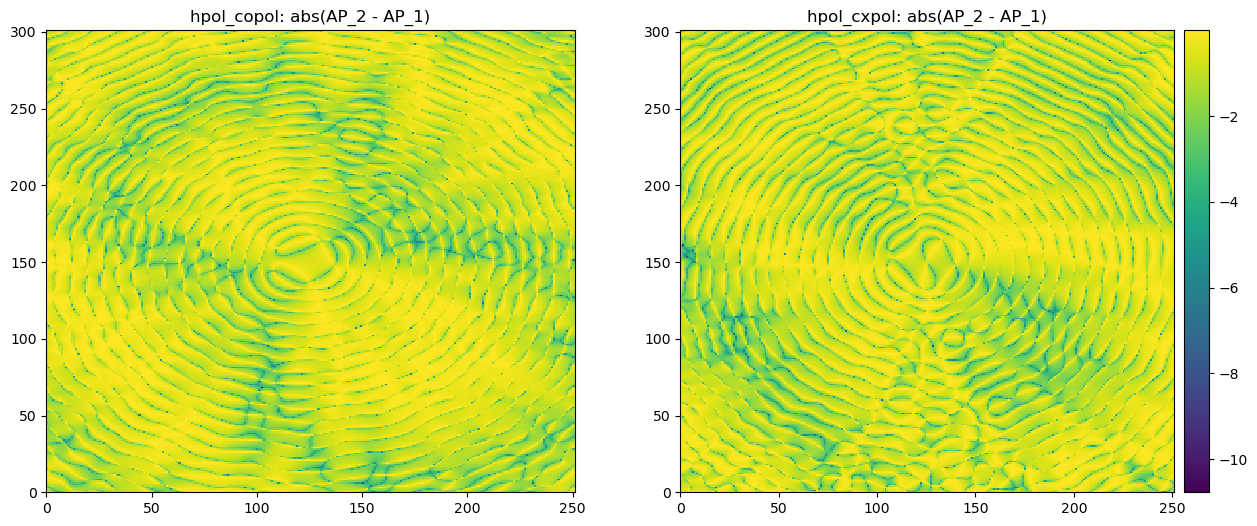

In [28]:
imgsdir = "imgs"
cmap = plt.get_cmap('viridis') 

# Ours - Joe's 
#print(Z[2].shape) 
diff = []
diff.append(np.abs(Z[2] - Z[0])/np.abs(Z[2] + Z[0])) 

#difference = np.nanmean(abs(AP_1 - AP_2)) 
#print(difference) 
#plt.imshow(diff[0])

print(f"Mean value is: {np.nanmean(diff[0])}") 

# Create a figure with 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#Z.append(cimr['horns']['C_Horn_01']['apat']['hpol_copol']) 
#print(Z.shape)
diff_plt = np.log10(diff[0]**2)
pcm1 = axes[0].pcolor(diff_plt, shading='auto')
axes[0].set_title('hpol_copol: abs(AP_2 - AP_1)')

mynum = np.abs(Z[3] - Z[1])/np.abs(Z[3] + Z[1])
diff.append(mynum) 

diff_plt = np.log10(diff[1]**2)
pcm2 = axes[1].pcolor(diff_plt, shading='auto')
axes[1].set_title('hpol_cxpol: abs(AP_2 - AP_1)')

#Z.append(cimr['horns']['C_Horn_01']['apat']['hpol_cxpol']) 
#Z_plt = np.log10(np.abs(Z[3])**2)
#pcm2 = axes[1].pcolor(Z_plt, shading='auto')
#axes[1].set_title('HBS: hpol_cxpol (uv)')

# Create a shared color bar
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')

print(Z[2][50,100])
print(Z[0][50,100])


In [8]:
cmap = plt.get_cmap('viridis') 

# Create a figure with 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 15))#10))

cimr = sp.io.loadmat(outfile)


imgsdir = "imgs"

#print(cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]) 

#print(np.shape(axes))

Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]

#print(Z.shape)

Z = np.log10(np.abs(Z)**2)
pcm1 = axes[0,0 ].pcolor(Z, shading='auto')
axes[0, 0].set_title('HBS: hpol_copol (uv, 001)')


Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_cxpol'][0][0]

print(Z.shape)

Z = np.log10(np.abs(Z)**2)
pcm2 = axes[0, 1].pcolor(Z, shading='auto')
axes[0, 1].set_title('HBS: hpol_cxpol (uv, 001)')

# Create a shared color bar
divider = make_axes_locatable(axes[0, 1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')

# 

outfile = pathlib.Path(f'../{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.xe.mat').resolve()
cimr = sp.io.loadmat(outfile)

Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]
Z = np.log10(np.abs(Z)**2)
pcm3 = axes[1, 0].pcolor(Z, shading='auto')
axes[1, 0].set_title('HBS: hpol_copol (xe, 001)')


Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_cxpol'][0][0]
Z = np.log10(np.abs(Z)**2)
pcm4 = axes[1, 1].pcolor(Z, shading='auto')
axes[1, 1].set_title('HBS: hpol_cxpol (xe, 001)')

# Create a shared color bar
divider = make_axes_locatable(axes[1, 1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm4, cax=cax)#, label='Values')


# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Saving figure
plt.savefig(f'../{imgsdir}/cimr_apat_hbs.C_Horn_01.uv&xe.png', dpi=300) 

# Show the plot
plt.show()

(301, 251)


/tmp/ipykernel_312401/4205580381.py:35: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')


OSError: Reader needs file name or open file-like object

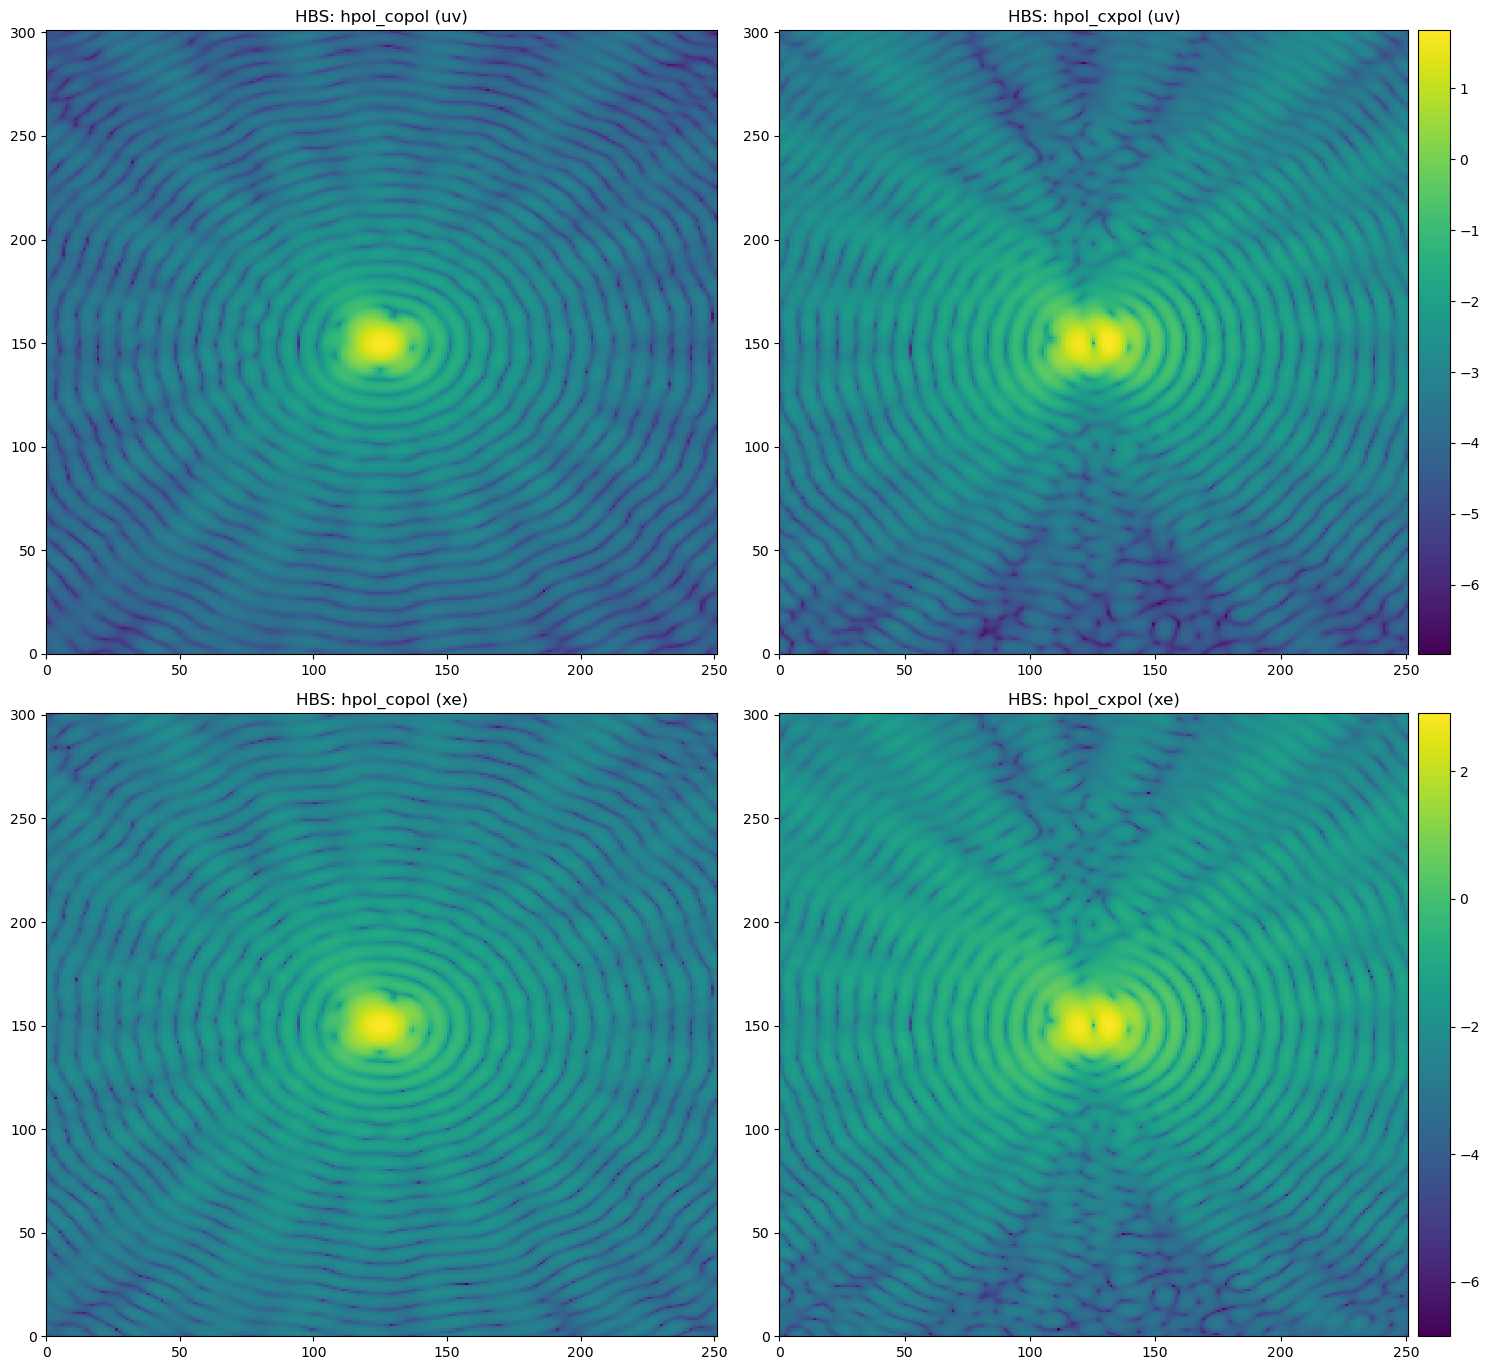

In [21]:
cmap = plt.get_cmap('viridis') 

outdir = "output"
outfile_hdf = pathlib.Path(f'./{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.uv.h5').resolve()

with h5py.File(outfile_hdf, 'r') as hdf5_file:
    cimr = lib.load_hdf5_to_dict(hdf5_file)

# Create a figure with 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#outdir = "processed"
#outfile = pathlib.Path(f'../{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.xe.mat').resolve()
#cimr = sp.io.loadmat(outfile)

imgsdir = "imgs"

#print(cimr['horns']['C_Horn_01']['apat'].keys()) 

#print(np.shape(axes))

Z = cimr['horns']['C_Horn_01']['apat']['hpol_copol']
#print(Z.shape)
Z = np.log10(np.abs(Z)**2)
pcm1 = axes[0, 0].pcolor(Z, shading='auto')
axes[0, 0].set_title('HBS: hpol_copol (uv)')


Z = cimr['horns']['C_Horn_01']['apat']['hpol_cxpol']
Z = np.log10(np.abs(Z)**2)
pcm2 = axes[0, 1].pcolor(Z, shading='auto')
axes[0, 1].set_title('HBS: hpol_cxpol (uv)')

# Create a shared color bar
divider = make_axes_locatable(axes[0, 1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm2, cax=cax)#, label='Values')

# 

outfile_hdf = pathlib.Path(f'./{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.xe.h5').resolve()

with h5py.File(outfile_hdf, 'r') as hdf5_file:
    cimr = lib.load_hdf5_to_dict(hdf5_file)


Z = cimr['horns']['C_Horn_01']['apat']['hpol_copol']
Z = np.log10(np.abs(Z)**2)
pcm3 = axes[1, 0].pcolor(Z, shading='auto')
axes[1, 0].set_title('HBS: hpol_copol (xe)')


Z = cimr['horns']['C_Horn_01']['apat']['hpol_cxpol']
Z = np.log10(np.abs(Z)**2)
pcm4 = axes[1, 1].pcolor(Z, shading='auto')
axes[1, 1].set_title('HBS: hpol_cxpol (xe)')

# Create a shared color bar
divider = make_axes_locatable(axes[1, 1])
cax = divider.append_axes("right", size="5%", pad=0.1)  # adjust the pad according to your preference
cbar = fig.colorbar(pcm4, cax=cax)#, label='Values')

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Saving figure
plt.savefig(f'../{imgsdir}/cimr_apat_hbs.C_Horn_01.ds_001.uv&xe_ours.png', dpi=300) 

# Show the plot
plt.show()

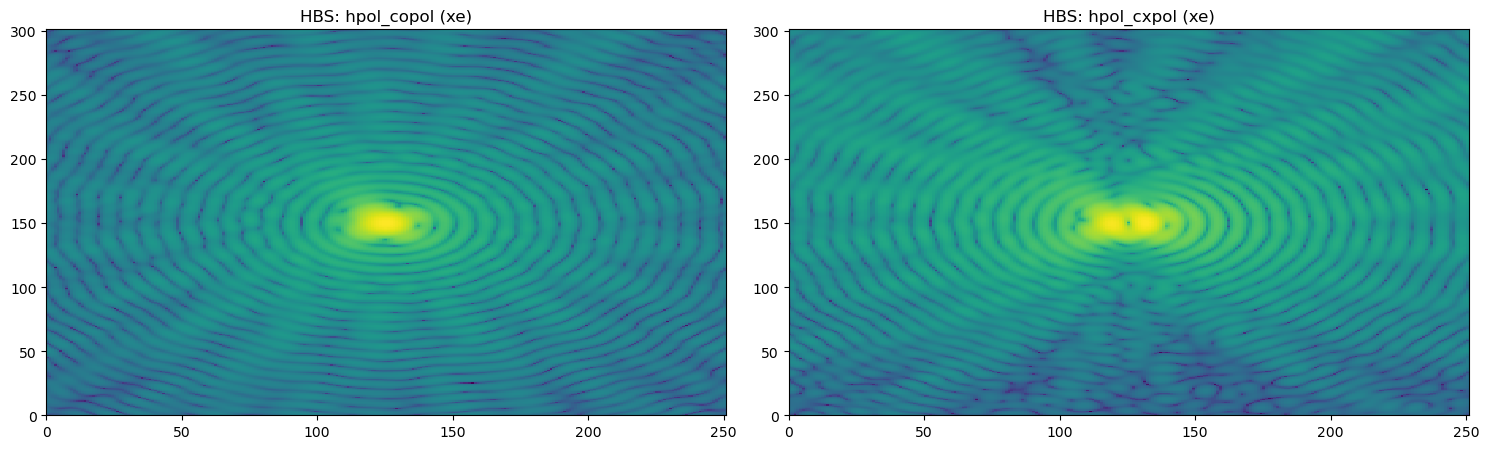

In [4]:
cmap = plt.get_cmap('viridis') 

# Create a figure with 2x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

outdir = "processed"
outfile = pathlib.Path(f'../{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.xe.mat').resolve()
cimr = sp.io.loadmat(outfile)

imgsdir = "imgs"

#print(cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]) 

#print(np.shape(axes))

Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[0].pcolor(Z, shading='auto')
axes[0].set_title('HBS: hpol_copol (xe)')


Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_cxpol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[1].pcolor(Z, shading='auto')
axes[1].set_title('HBS: hpol_cxpol (xe)')


# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Saving figure
plt.savefig(f'../{imgsdir}/cimr_apat_hbs.C_Horn_01.ds_001.xe.png', dpi=300) 

# Show the plot
plt.show()

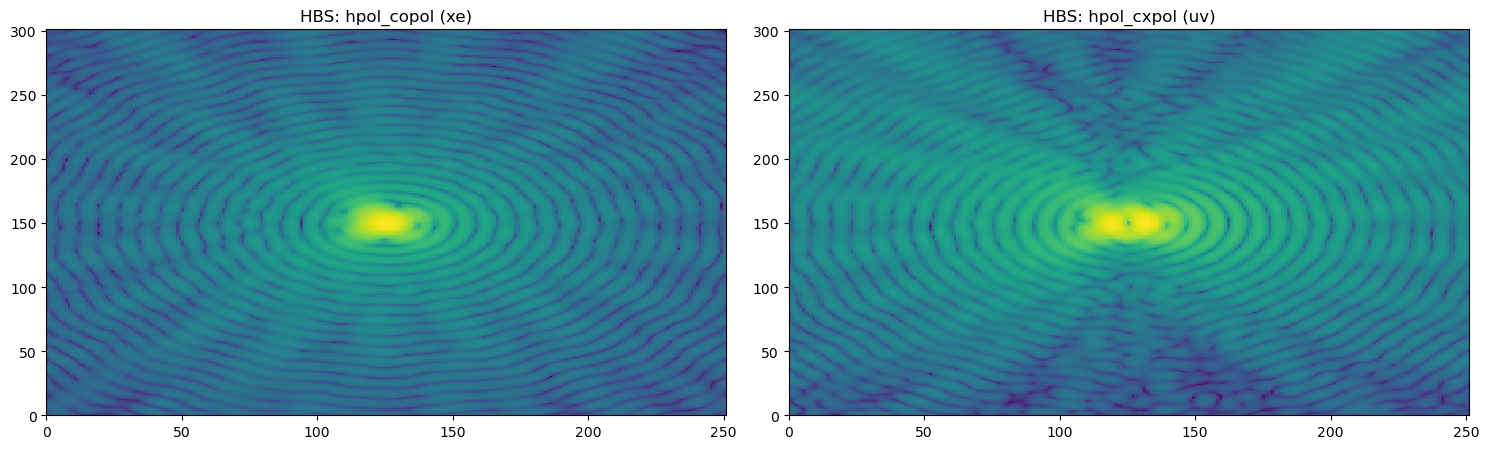

In [5]:
cmap = plt.get_cmap('viridis') 

# Create a figure with 2x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

outdir = "processed"
outfile = pathlib.Path(f'../{outdir}/cimr_apat_hbs.C_Horn_01.ds_001.uv.mat').resolve()
cimr = sp.io.loadmat(outfile)

imgsdir = "imgs"

#print(cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]) 

#print(np.shape(axes))

Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_copol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[0].pcolor(Z, shading='auto')
axes[0].set_title('HBS: hpol_copol (xe)')


Z = cimr['horns'][0][0]['C_Horn_01'][0][0]['apat']['hpol_cxpol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[1].pcolor(Z, shading='auto')
axes[1].set_title('HBS: hpol_cxpol (uv)')


# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Saving figure
plt.savefig(f'../{imgsdir}/cimr_apat_hbs.C_Horn_01.ds_001.uv.png', dpi=300) 

# Show the plot
plt.show()

OSError: Reader needs file name or open file-like object

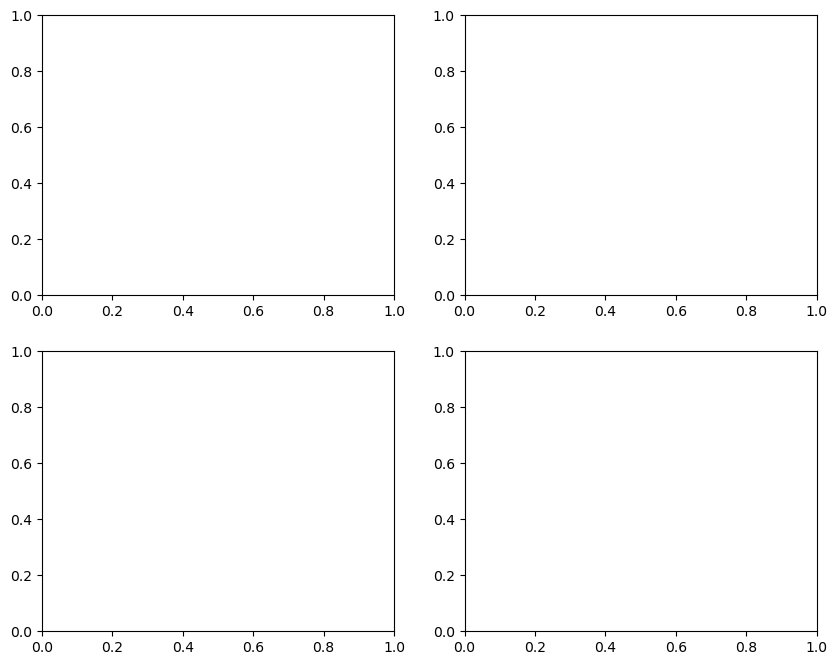

In [6]:
"""
Plotting Joe's parsed beam files. 
"""
#print(matplotlib.get_backend())  
#print("Plotting resultant beam")
# This part of the code is Matplotlib-like implementation
#plt.clf()
cmap = plt.get_cmap('viridis')  # You can change the colormap as needed

#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_FHS']['apat']['hpol_copol'])**2)
#plt.pcolor(Z, cmap=cmap, shading='auto')
#plt.colorbar()
#plt.grid(True)

# Save the plot as a PNG file
#plt.savefig('output/cimr_apat_xe_full.C_Horn_01_ours_python.png', dpi=300)  # You can change the file name as needed
#plt.show()



# Generate sample data (replace this with your actual data)
#x = np.linspace(0, 10, 100)
#y = np.linspace(0, 5, 50)
#X, Y = np.meshgrid(x, y)

# Generate 4 different results (replace this with your actual data)
#result1 = np.sin(X) * np.cos(Y)
#result2 = np.cos(X) * np.sin(Y)
#result3 = np.sin(X + Y)
#result4 = np.cos(X - Y)

# Create a figure with 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# --------------------------------------------------------------------------------
# Joe's code + Joe's beam
# --------------------------------------------------------------------------------
outdir = "../grasp-rgb_old/output"
outfile = pathlib.Path(f'./{outdir}/joe_cimr_apat_xe_full.C_Horn_01.mat').resolve()
cimr = sp.io.loadmat(outfile)

print(cimr['horns'][0][0]['C_Horn_01_FHS'][0][0]['apat']['hpol_copol'][0][0]) 
#exit() 

# FHS:
Z = cimr['horns'][0][0]['C_Horn_01_FHS'][0][0]['apat']['hpol_copol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[0, 0].pcolor(Z, shading='auto')
axes[0, 0].set_title('FHS: Hpol_copol')

# BHS:
Z = cimr['horns'][0][0]['C_Horn_01_BHS'][0][0]['apat']['hpol_copol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[1, 0].pcolor(Z, shading='auto')
axes[1, 0].set_title('BHS: Hpol_copol')
# --------------------------------------------------------------------------------

# FHS: Joe's code + Our beam 
#axes[0, 1].pcolor(X, Y, result2, shading='auto')
#axes[0, 1].set_title('Result 2')


# --------------------------------------------------------------------------------
# Our code + Our Beam 
# --------------------------------------------------------------------------------
outdir = "output"
#if not pathlib.Path(outdir).exists(): 
#    print(f"Creating output directory:\n{outdir}")
#    pathlib.Path(outdir).mkdir()
outfile = pathlib.Path(f'./{outdir}/cimr_apat_xe_full.C_Horn_01.h5').resolve()

# Open the HDF5 file and load it into a dictionary
with h5py.File(outfile, 'r') as hdf5_file:
    cimr = lib.load_hdf5_to_dict(hdf5_file)

# FHS: 
Z = np.log10(np.abs(cimr['horns']['C_Horn_01_FHS']['apat']['hpol_copol'])**2)
axes[0, 1].pcolor(Z, shading='auto')
axes[0, 1].set_title('FHS: Hpol_copol')

# BHS:
Z = np.log10(np.abs(cimr['horns']['C_Horn_01_BHS']['apat']['hpol_copol'])**2)
axes[1, 1].pcolor(Z, shading='auto')
axes[1, 1].set_title('BHS: Hpol_copol')
# --------------------------------------------------------------------------------



# cxpol 

# FHS: Our code + Our Beam 
#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_FHS']['apat']['hpol_cxpol'])**2)
#axes[2, 2].pcolor(Z, shading='auto')
#axes[2, 2].set_title('FHS: Hpol_cxpol')


# BHS:
#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_BHS']['apat']['hpol_cxpol'])**2)
#axes[3, 2].pcolor(Z, shading='auto')
#axes[3, 2].set_title('BHS: Hpol_cxpol')

# Add common colorbar for all subplots
#cbar = fig.colorbar(axes[0, 1].pcolormesh(X, Y, result1, shading='auto'), ax=axes, orientation='vertical')

# Add titles and labels as needed
fig.suptitle(f"Horizontal co-polarization amplitude^2 (Ludwig's 3d definition).\nLeft -- Joe's code. Right -- Our code.") 
# {len(axes) * len(axes[0])} Different Results")
for ax in axes.flat:
    ax.set_xlabel('xi')
    ax.set_ylabel('eta')

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Saving figure
plt.savefig('output/cimr_apat_xe_full.png', dpi=300) 

# Show the plot
plt.show()

In [ ]:
"""
Plotting Ours parsed beam files. 
"""
#print(matplotlib.get_backend())  
#print("Plotting resultant beam")
# This part of the code is Matplotlib-like implementation
#plt.clf()
cmap = plt.get_cmap('viridis')  # You can change the colormap as needed

#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_FHS']['apat']['hpol_copol'])**2)
#plt.pcolor(Z, cmap=cmap, shading='auto')
#plt.colorbar()
#plt.grid(True)

# Save the plot as a PNG file
#plt.savefig('output/cimr_apat_xe_full.C_Horn_01_ours_python.png', dpi=300)  # You can change the file name as needed
#plt.show()



# Generate sample data (replace this with your actual data)
#x = np.linspace(0, 10, 100)
#y = np.linspace(0, 5, 50)
#X, Y = np.meshgrid(x, y)

# Generate 4 different results (replace this with your actual data)
#result1 = np.sin(X) * np.cos(Y)
#result2 = np.cos(X) * np.sin(Y)
#result3 = np.sin(X + Y)
#result4 = np.cos(X - Y)

# Create a figure with 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# --------------------------------------------------------------------------------
# Joe's code + Joe's beam
# --------------------------------------------------------------------------------
outdir = "../grasp-rgb_old/data_ours"
outfile = pathlib.Path(f'./{outdir}/cimr_apat_xe_full.C_Horn_01.mat').resolve()
cimr = sp.io.loadmat(outfile)

print(cimr['horns'][0][0]['C_Horn_01_FHS'][0][0]['apat']['hpol_copol'][0][0]) 
#exit() 

# FHS:
Z = cimr['horns'][0][0]['C_Horn_01_FHS'][0][0]['apat']['hpol_copol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[0, 0].pcolor(Z, shading='auto')
axes[0, 0].set_title('FHS: Hpol_copol')

# BHS:
Z = cimr['horns'][0][0]['C_Horn_01_BHS'][0][0]['apat']['hpol_copol'][0][0]
Z = np.log10(np.abs(Z)**2)
axes[1, 0].pcolor(Z, shading='auto')
axes[1, 0].set_title('BHS: Hpol_copol')
# --------------------------------------------------------------------------------

# FHS: Joe's code + Our beam 
#axes[0, 1].pcolor(X, Y, result2, shading='auto')
#axes[0, 1].set_title('Result 2')


# --------------------------------------------------------------------------------
# Our code + Our Beam 
# --------------------------------------------------------------------------------
#outdir = "output"
#if not pathlib.Path(outdir).exists(): 
#    print(f"Creating output directory:\n{outdir}")
#    pathlib.Path(outdir).mkdir()
#outfile = pathlib.Path(f'./{outdir}/cimr_apat_xe_full.C_Horn_01.h5').resolve()

# Open the HDF5 file and load it into a dictionary
#with h5py.File(outfile, 'r') as hdf5_file:
#    cimr = lib.load_hdf5_to_dict(hdf5_file)

# FHS: 
#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_FHS']['apat']['hpol_copol'])**2)
#axes[0, 1].pcolor(Z, shading='auto')
#axes[0, 1].set_title('FHS: Hpol_copol')

# BHS:
#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_BHS']['apat']['hpol_copol'])**2)
#axes[1, 1].pcolor(Z, shading='auto')
#axes[1, 1].set_title('BHS: Hpol_copol')
# --------------------------------------------------------------------------------



# cxpol 

# FHS: Our code + Our Beam 
#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_FHS']['apat']['hpol_cxpol'])**2)
#axes[2, 2].pcolor(Z, shading='auto')
#axes[2, 2].set_title('FHS: Hpol_cxpol')


# BHS:
#Z = np.log10(np.abs(cimr['horns']['C_Horn_01_BHS']['apat']['hpol_cxpol'])**2)
#axes[3, 2].pcolor(Z, shading='auto')
#axes[3, 2].set_title('BHS: Hpol_cxpol')

# Add common colorbar for all subplots
#cbar = fig.colorbar(axes[0, 1].pcolormesh(X, Y, result1, shading='auto'), ax=axes, orientation='vertical')

# Add titles and labels as needed
fig.suptitle(f"Horizontal co-polarization amplitude^2 (Ludwig's 3d definition).\nLeft -- Joe's code. Right -- Our code.") 
# {len(axes) * len(axes[0])} Different Results")
for ax in axes.flat:
    ax.set_xlabel('xi')
    ax.set_ylabel('eta')

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Saving figure
#plt.savefig('output/cimr_apat_xe_full.png', dpi=300) 

# Show the plot
plt.show() 

In [10]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

# Create nested dictionary with random data
nested_dict = {
    "horns": {
        "BAND1_Horn_01": {
            "apat": {
                "dict1": np.random.rand(10, 10),  # Sample array1
                "dict2": np.random.rand(10, 10) * 1j  # Sample complex array
            },
        },
        "BAND2_Horn_02": {
            "apat": {
                "dict3": np.random.rand(10, 10) * 1j  # Sample complex array
            }
        }
    }
}

# Save dictionary to .mat file
io.savemat('random_data.mat', nested_dict)

# Retrieve dictionary from .mat file
loaded_data = io.loadmat('random_data.mat')

# Extract the array from the loaded data
array_to_plot = loaded_data['horns'][0][0]['BAND1_Horn_01'][0][0]['apat'][0][0]['dict1']

# Plot the loaded data using pcolor plot
plt.figure(figsize=(10, 6))
plt.pcolor(array_to_plot)
plt.colorbar(label='Value')
plt.title('Random Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


/tmp/ipykernel_61711/953985831.py:22: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(label='Value')


Text(0, 0.5, 'Y-axis')

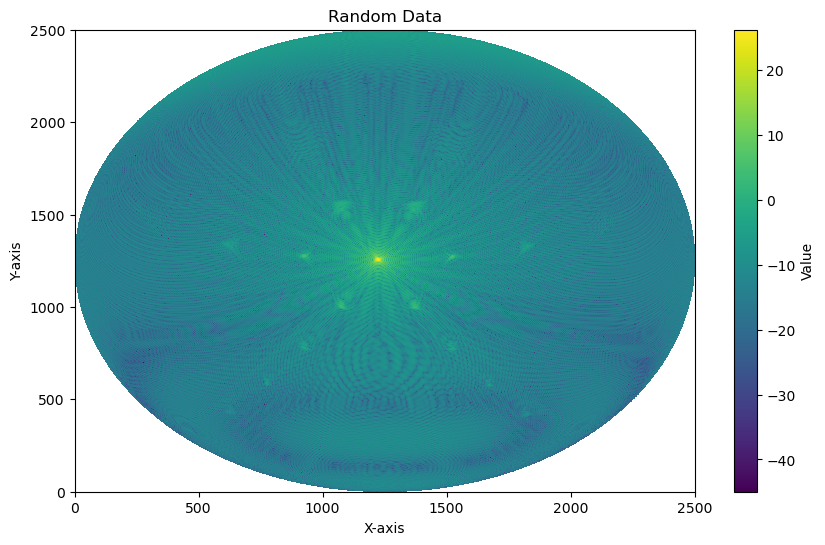

In [16]:
import pathlib 

import numpy as np
from scipy import io
import matplotlib.pyplot as plt



#matfile = pathlib.Path("../my.mat").resolve()  

# Retrieve dictionary from .mat file 
loaded_data = io.loadmat('../output/C/C1-6875-H-FR.mat')

# Extract the array from the loaded data
array_to_plot = loaded_data['horns'][0][0]['C_Horn_01_FHS'][0][0]['apat'][0][0]['hpol_copol']

# Plot the loaded data using pcolor plot
plt.figure(figsize=(10, 6))
plt.pcolor(np.log10(np.abs(array_to_plot)**10))
plt.colorbar(label='Value')
plt.title('Random Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [3]:
from scipy.io import loadmat, savemat
import numpy as np

# List of filenames
filenames = [
    "S1-12345-E-FR.mat", "S1-12345-E-BK.mat",
    "F1-12345-E-FR.mat", "F1-12345-E-BK.mat",
    "F2-12345-E-FR.mat", "F2-12345-E-BK.mat",
    "F3-12345-E-FR.mat", "F3-12345-E-BK.mat"
]

# Dictionary to store combined data
combined_data = {}

for filename in filenames:
    # Extract relevant information from filename
    parts = filename.split('-')
    prefix = parts[0]  # S1, F1, F2, ...
    suffix = parts[-1]  # FR.mat, BK.mat, ...
    
    # Skip if not FR or BK
    if suffix not in ['FR.mat', 'BK.mat']:
        continue
    print(prefix, suffix)
    
    # Read data from the MAT file
    #data = loadmat(filename)
    
    # Extract the actual data
    #file_data = data['data']
    
    # Extract the direction (Forward/Backward) from filename
    #direction = 'Forward' if suffix == 'FR.mat' else 'Backward'
    
    # Combine data for the same prefix
    #if prefix in combined_data:
    #    combined_data[prefix][direction] = file_data
    #else:
    #    combined_data[prefix] = {direction: file_data}

# Write combined data to new MAT files
#for prefix, data in combined_data.items():
#    output_filename = f"{prefix}_combined.mat"
#    savemat(output_filename, data)

#print("Combination completed successfully!")



S1 FR.mat
S1 BK.mat
F1 FR.mat
F1 BK.mat
F2 FR.mat
F2 BK.mat
F3 FR.mat
F3 BK.mat
